# ⭐Imports

In [1]:
from FUNCTIONS import *
%matplotlib inline

TensorFlow Version:  2.1.0


# ⭐ Build Classifier

## 🔵 Preprocess Data 

In [2]:
# MAIN
data_s = np.array(pd.read_csv('data/data_s_180k').iloc[:, 1:])
data_b = np.array(pd.read_csv('data/data_b_180k').iloc[:, 1:])

# Slice & Save
events_no = int(30000)
data_s = data_s[0:events_no*40, 0:40]
data_b = data_b[0:events_no*40, 0:40]

# # Save Datasets
# pd.DataFrame(data_s).to_csv('data_s_1000')
# pd.DataFrame(data_b).to_csv('data_b_1000')

Total Events: 60000
Total Labels: 60000

Shape:  (60000, 1600)

Train:  (41820, 1600) (41820,)
Val:  (9180, 1600) (9180,)
Test:  (9000, 1600) (9000,)
 


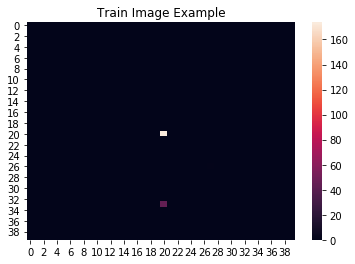

In [3]:
train_examples, train_labels, val_examples, val_labels, test_examples, test_labels = preprocess_ML_sklearn(data_s, data_b)

import sklearn.discriminant_analysis
random.seed(42)

random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)
svm = SVC(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)
KNN = sklearn.neighbors.KNeighborsClassifier()
naive_bayes = MultinomialNB()
BDT = sklearn.ensemble.GradientBoostingClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
naive_bayes_g = GaussianNB()
bagging = BaggingClassifier(random_state=42, n_jobs=-1)
SGD = sklearn.linear_model.SGDClassifier(random_state=42)
LDA = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()


models = [naive_bayes, random_forest, svm, adaboost, KNN, BDT, decision_tree, naive_bayes_g, bagging, SGD, LDA]

## 🔵 Create Models

🔴 Instantiate Models

In [5]:
import sklearn.discriminant_analysis
random.seed(42)

random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)
svm = SVC(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)
KNN = sklearn.neighbors.KNeighborsClassifier()
naive_bayes = MultinomialNB()
BDT = sklearn.ensemble.GradientBoostingClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
naive_bayes_g = GaussianNB()
bagging = BaggingClassifier(random_state=42, n_jobs=-1)
SGD = sklearn.linear_model.SGDClassifier(random_state=42)
LDA = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()


models = [naive_bayes, random_forest, svm, adaboost, KNN, BDT, decision_tree, naive_bayes_g, bagging, SGD, LDA]

### 🔵 1. First Elimination
**Initial Algorithms**: 11 </br>
**After Elimination**: 5

Also compare training times and see if more data improves accuracy (to justify 200k events)

**Notes**
- 100k signals and 100k backgrounds
- No hyperparameter Tuning


### 🔵 2. Second Elimination (SVMs, RF, MultiNB, KNN, Bagging, (maybe gradient boosting))

**Initial Algorithms**: 5 </br>
**After Elimination**: 2

Also compare training times and see if more data improves accuracy (to justify 200k events)

**Notes**
- 100k signals and 100k backgrounds
- With (light) Hyperparameter Tuning 


### 🔵 3. Third Elimination
**Initial Algorithms**: 5 </br>
**After Elimination**: 2

Also compare training times and see if more data improves accuracy (to justify 200k events with heavy hyperparameter tuning maybe)

**Notes**
- 2 mill signals and 2 mill backgrounds
- With (light/heavy) Hyperparameter Tuning 


## 🔵 (Prep) Hyperparameter Tuning (Hardcore)

In [4]:
# Naive Bayes
alpha = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

# Bagging
n_estimators_bagging = [10, 20, 30, 50, 100, 200, 300]
max_samples_bagging = [0.1, 0.2, 0.5, 1.0, 2.0, 3.0, 5.0]
max_features_bagging = [0.5, 1.0, 2.0, 3.0, 50.0, 200]

# Random Forests
criterion = ['gini', 'entropy']
n_estimators_rf = [100, 150, 200]
max_depth_rf = [None, 1, 3, 5, 10]
min_samples_leaf_rf = [5, 10]
min_samples_split_rf = [5, 10]


# SVC
kernel = ['rbf']
c_parameter = [0.0001, 0.001, 0.01, 0.1, 1, 10]
gamma = [0.0001, 0.001, 0.01, 0.1, 1]


# AdaBoost
n_estimators_ada = [10, 30, 50, 100, 200, 500]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]


# Hyperparameters
naive_bayes_parameters = {'alpha': alpha}
naive_bayes_g_parameters = {'var_smoothing': np.logspace(0,-9, num=1000)}
bagging_parameters = {'n_estimators': n_estimators_bagging, 'max_features': max_features_bagging, 'max_samples': max_samples_bagging}
random_forest_parameters = {'n_estimators': n_estimators_rf, 'max_depth': max_depth_rf, 'min_samples_leaf': min_samples_leaf_rf, 'min_samples_split': min_samples_split_rf}
svm_parameters = {'kernel': kernel, 'C': c_parameter, 'gamma': gamma}
adaboost_parameters = {'n_estimators': n_estimators_ada, 'learning_rate': learning_rate}

# Scoring object using accuracy
scorer = make_scorer(accuracy_score)


clfs_param =[(random_forest, random_forest_parameters), 
             (naive_bayes, naive_bayes_parameters), 
             (naive_bayes_g, naive_bayes_g_parameters), 
             (bagging, bagging_parameters),  
             (svm, svm_parameters), 
             (adaboost, adaboost_parameters)]

## 🔵 (Prep) Hyperparameter Tuning (Softcore)

In [5]:
random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)
svm = SVC(random_state=42)
KNN = sklearn.neighbors.KNeighborsClassifier()
naive_bayes = MultinomialNB()
BDT = sklearn.ensemble.GradientBoostingClassifier()
bagging = BaggingClassifier(random_state=42, n_jobs=-1)

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from time import time


# Naive Bayes
alpha = [0, 0.001, 0.01, 0.1, 0.5, 1, 1.5, 2, 5, 10, 15, 50]

# Bagging
n_estimators_bagging = [10, 20, 50, 100, 200, 300]
max_samples_bagging = [0.1, 0.2, 0.5, 1.0, 2.0, 3.0]
max_features_bagging = [0.5, 1.0, 2.0, 3.0, 50.0, 200]

# Random Forests
bootstrap = [True, False]
criterion = ['gini', 'entropy']
n_estimators_rf = [10, 50, 100, 200, 500, 1000, 2000, 5000]
max_depth_rf = [10, 20, 40, 50, 70, 100, None]
max_features_rf = ['auto', 'sqrt']
min_samples_leaf_rf = [1, 2, 4, 8, 15, 40]
min_samples_split_rf = [2, 5, 10, 30, 50]

# SVC
kernel = ['rbf']
c_parameter = [0.1, 1, 10]
gamma = [0.001, 0.01, 0.1, 1, 5]


# KNN
n_neighbors=[1, 2, 5, 10, 20, 30]
leaf_size_KNN=[1, 5, 10, 20, 30, 50]
p=[1, 2]

# GradientBoosting
n_estimators_GB = [10, 50, 100, 500, 2000]
learning_rate_GB = [0.01, 0.1, 1, 3]
min_samples_split_GB = [1, 2, 10]
min_samples_leaf_GB = [1, 5, 10]
max_depth_GB = [1, 3, 10, 50]



# Hyperparameters
naive_bayes_parameters = {'alpha': alpha}
bagging_parameters = {'n_estimators': n_estimators_bagging, 'max_features': max_features_bagging, 'max_samples': max_samples_bagging}
random_forest_parameters = {'bootstrap': bootstrap, 'criterion': criterion, 'max_features':max_features_rf, 'n_estimators': n_estimators_rf, 'max_depth': max_depth_rf, 'min_samples_leaf': min_samples_leaf_rf, 'min_samples_split': min_samples_split_rf}
svm_parameters = {'kernel': kernel, 'C': c_parameter, 'gamma': gamma}
GB_parameters = {'n_estimators_': n_estimators_GB, 'learning_rate': learning_rate_GB, 'min_samples_split': min_samples_split_GB, 'min_samples_split': min_samples_split_GB, 'min_samples_leaf': min_samples_leaf_GB, 'max_depth': max_depth_GB}
KNN_parameters = {'n_neighbors': n_neighbors, 'leaf_size': leaf_size_KNN, 'p': p}

# Scoring object using accuracy
scorer = make_scorer(f1_score)


clfs_param =[(naive_bayes, naive_bayes_parameters), 
             (random_forest, random_forest_parameters),
             (KNN, KNN_parameters),
             (BDT, GB_parameters),
             (bagging, bagging_parameters),
             (svm, svm_parameters)]

## 🔵 Hyperparameter Tuning

In [ ]:
# Create list to store models
models = []
unopt_f1 = []
f1 = []

# Perform grid search
for clf, parameter in clfs_param:
    print('\n{}\n'.format(clf.__class__.__name__))
    
    grid_obj = GridSearchCV(clf, parameter, scoring=scorer, n_jobs = 6)
    
    # Perform grid search
    start = time.time()
    grid_fit = grid_obj.fit(train_examples, train_labels)
    end = time.time()
    print('Time to tune: {}s'.format(round(end - start), 2))
    
    # Get best estimator
    best_clf = grid_fit.best_estimator_
    models.append(best_clf)
    
    # Make predictions using the unoptimized and model
    start = time.time()
    predictions = (clf.fit(train_examples, train_labels)).predict(val_examples)
    best_predictions = best_clf.predict(val_examples)
    
    predictions_train = (clf.fit(train_examples, train_labels)).predict(train_examples)
    best_predictions_train = best_clf.predict(train_examples)
    end = time.time()
    print('Time to fit-predict: {}s\n'.format(round(end - start), 2))
    
    # Check hyperparameters
    print('Unoptimised: {}\n'.format(clf.get_params(deep = True)))
    print('Optimised: {}\n'.format(best_clf.get_params(deep = True)))
    
    # Print Results
    print("\nUnoptimised-f1-training: {:.4f}".format(f1_score(train_labels, predictions_train)))
    print("Optimised-f1-training: {:.4f}".format(f1_score(train_labels, best_predictions_train)))
    
    print("\nUnoptimised-f1-validation: {:.4f}".format(f1_score(val_labels, predictions)))
    print("Optimised-f1-validation: {:.4f}".format(f1_score(val_labels, best_predictions)))
    
    print('\n\n=============================================================================================')
    
    unopt_f1.append(accuracy_score(val_labels, predictions))
    f1.append(accuracy_score(val_labels, best_predictions))
    
print('All unoptimised f1 (validation): {}'.format(unopt_f1))
print('Best unoptimised f1 (validation): {}\n'.format(max(unopt_f1)))
print('All optimised f1 (validation): {}'.format(f1))
print('Best optimised f1 (validation): {}'.format(max(f1)))


RandomForestClassifier



## 🔵 Model Performance

In [ ]:
# Compare f1 score
compare_f1(models, test_examples, test_labels)

In [ ]:
# Plot Confusion Matrices
cmx_sklearn(models, test_examples, test_labels)

## 🔵 Bagging RF

In [ ]:
model_bagg = models[2]
model_rf = models[3]


bagg_param_final = {'base_estimator': [model_rf], 'n_estimators': [300, 500], 'max_features': [0.2, 0.3, 0.5, 0.7], 'max_samples': [1.0]}


print('\n{}\n'.format(clf.__class__.__name__))

grid_obj = GridSearchCV(model_bagg, bagg_param_final, scoring=scorer, n_jobs = 6, verbose = 5)


# Perform grid search
start = time.time()
grid_fit = grid_obj.fit(train_examples, train_labels)
end = time.time()
print('Time to tune: {}s\n'.format(round(end - start), 2))

# Get best estimator
best_clf = grid_fit.best_estimator_
models.append(best_clf)

# Make predictions using the unoptimized and model
predictions = (model_bagg.fit(train_examples, train_labels)).predict(val_examples)
best_predictions = best_clf.predict(val_examples)

predictions_train = (model_bagg.fit(train_examples, train_labels)).predict(train_examples)
best_predictions_train = best_clf.predict(train_examples)

# Check hyperparameters
print('Unoptomised: {}\n'.format(model_bagg.get_params(deep = True)))
print('Optomised: {}\n'.format(best_clf.get_params(deep = True)))

# Print Results
print("\nUnoptimised-Accuracy-Training: {:.4f}".format(accuracy_score(train_labels, predictions_train)))
print("Optimised-Accuracy-training: {:.4f}".format(accuracy_score(train_labels, best_predictions_train)))

print("\nUnoptimised-Accuracy-validation: {:.4f}".format(accuracy_score(val_labels, predictions)))
print("Optimised-Accuracy-validation: {:.4f}".format(accuracy_score(val_labels, best_predictions)))

print('\n \n \n=============================================================================================')

unopt_f1.append(accuracy_score(val_labels, predictions))
f1.append(accuracy_score(val_labels, best_predictions))